In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

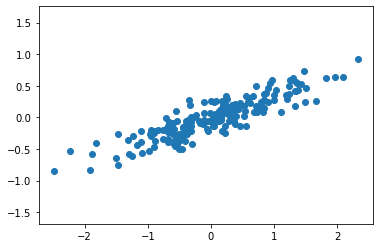

In [4]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2),rng.randn(2,200)).T
plt.scatter(X[:,0],X[:,1])
plt.axis('equal')

# We can see there is a linear relationship but in unsupervised learning we need to find out it between X and y

# In PCA, this relationship is quantified by finding a list of the principal axes in the data, and using those axes to describe the dataset.

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components =2)
pca.fit(X)

PCA(n_components=2)

In [6]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [7]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


# Now we visualize them as vectors over the input data, "components" as the direction of the vector and the "explained variance" as the squared length of the vector

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

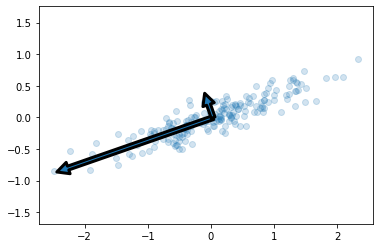

In [12]:
def draw_vector(v0,v1,ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(
                     linewidth = 3,
                     shrinkA = 0, shrinkB = 0)
    ax.annotate('',v1,v0,arrowprops = arrowprops)
    

plt.scatter(X[:,0],X[:,1],alpha=0.2)
for length,vector in zip(pca.explained_variance_,pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_,pca.mean_ + v)
plt.axis('equal')

# These vectors represent the principal axes of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data - more precisely.

# PCA for dimensionality reduction

In [13]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [15]:
pca = PCA(2) #project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


# We can now plot the first two principal components of each point to learn about the data

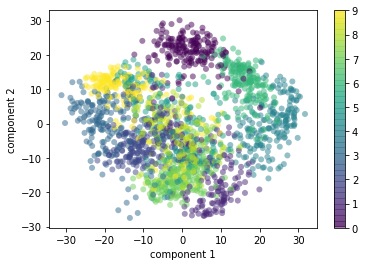

In [19]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            #cmap=plt.cm.get_cmap('spectral', 10)
           )
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

# The full data is a 64 dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.

# Important to estimate how many components are needed to describe the data.This can be determined by looking at the cumulative explained variance ratio as a function of the number of components

Text(0, 0.5, 'cumulative explained variance')

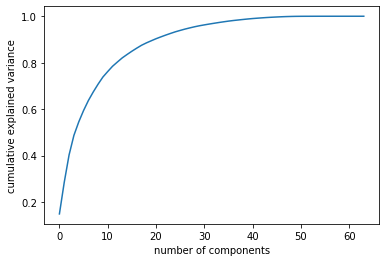

In [22]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')